In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# known parameters
weight=0.7
bias=0.3

# Create data
start = 0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

In [3]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [4]:
X.shape

torch.Size([50, 1])

In [5]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


<IPython.core.display.Javascript object>

In [7]:
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [8]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias=nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))

    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input
            return self.weights * x + self.bias

In [9]:
torch.manual_seed(42)

model_lr=LinearRegressionModel()

list(model_lr.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters 
model_lr.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_lr(X_test)


In [12]:
y_preds

tensor([[0.3645],
        [0.3241],
        [0.4520],
        [0.1490],
        [0.2096],
        [0.1625],
        [0.4049],
        [0.4116],
        [0.3106],
        [0.4318]])

In [13]:
y_test

tensor([[0.7900],
        [0.7060],
        [0.9720],
        [0.3420],
        [0.4680],
        [0.3700],
        [0.8740],
        [0.8880],
        [0.6780],
        [0.9300]])

In [14]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3645],
        [0.3241],
        [0.4520],
        [0.1490],
        [0.2096],
        [0.1625],
        [0.4049],
        [0.4116],
        [0.3106],
        [0.4318]])


In [15]:
y_test - y_preds

tensor([[0.4255],
        [0.3819],
        [0.5200],
        [0.1930],
        [0.2584],
        [0.2075],
        [0.4691],
        [0.4764],
        [0.3674],
        [0.4982]])

In [16]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

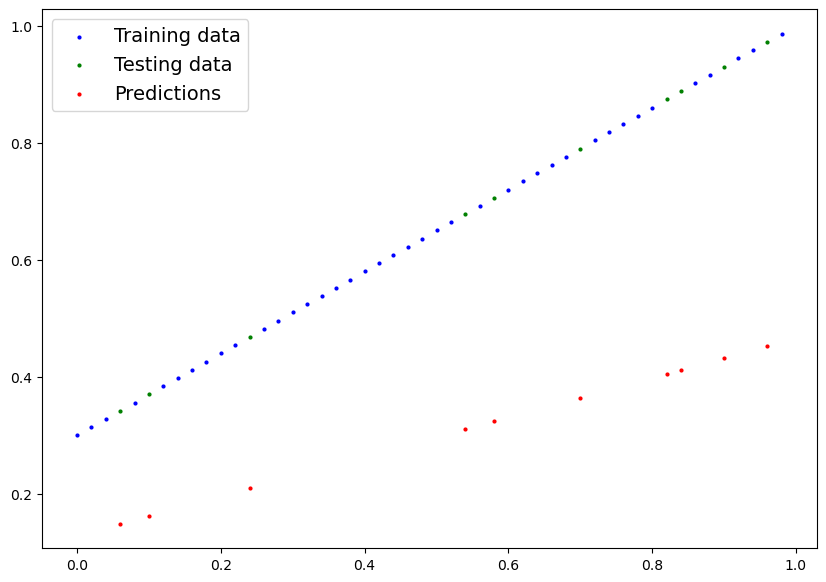

In [17]:
plot_predictions(predictions=y_preds)

In [18]:
list(model_lr.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# Setup a loss function
loss_fn=nn.L1Loss()

# Setup optimizer
optimizer=torch.optim.SGD(params=model_lr.parameters(),lr=0.01)

In [20]:
torch.manual_seed(42)

epochs=100

train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
    #Train
    model_lr.train()

    y_pred=model_lr(X_train)

    loss=loss_fn(y_pred,y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Test
    model_lr.eval()

    with torch.inference_mode():
        test_pred=model_lr(X_test)

        test_loss=loss_fn(test_pred,y_test.type(torch.float))
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")




Epoch: 0 | MAE Train Loss: 0.3415827751159668 | MAE Test Loss: 0.3670382499694824 
Epoch: 1 | MAE Train Loss: 0.3293831944465637 | MAE Test Loss: 0.35434621572494507 
Epoch: 2 | MAE Train Loss: 0.31718358397483826 | MAE Test Loss: 0.34165412187576294 
Epoch: 3 | MAE Train Loss: 0.3049840033054352 | MAE Test Loss: 0.3289620876312256 
Epoch: 4 | MAE Train Loss: 0.2927843928337097 | MAE Test Loss: 0.31627005338668823 
Epoch: 5 | MAE Train Loss: 0.28058475255966187 | MAE Test Loss: 0.3035779595375061 
Epoch: 6 | MAE Train Loss: 0.268385112285614 | MAE Test Loss: 0.29088589549064636 
Epoch: 7 | MAE Train Loss: 0.2561855614185333 | MAE Test Loss: 0.2781938314437866 
Epoch: 8 | MAE Train Loss: 0.24398592114448547 | MAE Test Loss: 0.2655017673969269 
Epoch: 9 | MAE Train Loss: 0.23178629577159882 | MAE Test Loss: 0.25280970335006714 
Epoch: 10 | MAE Train Loss: 0.21958670020103455 | MAE Test Loss: 0.2401176393032074 
Epoch: 11 | MAE Train Loss: 0.20738711953163147 | MAE Test Loss: 0.2274255752

In [21]:
# 1. Set the model in evaluation mode
model_lr.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_lr(X_test)
y_preds

tensor([[0.7722],
        [0.6980],
        [0.9328],
        [0.3769],
        [0.4880],
        [0.4016],
        [0.8463],
        [0.8586],
        [0.6733],
        [0.8957]])

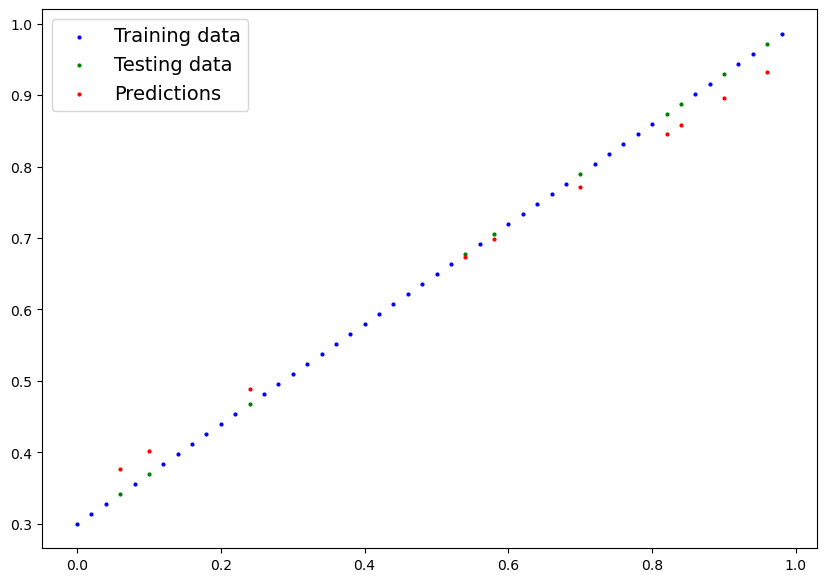

In [22]:
plot_predictions(predictions=y_preds)


In [23]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_lr.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_lr.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_lr.pth


In [24]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [26]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [27]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [28]:
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [29]:
torch.manual_seed(42)
model_1=LinearRegressionV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [31]:
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [36]:
torch.manual_seed(42)

epochs=1000

for epoch in range(epochs):
    #Train
    model_1.train()
    y_pred=model_1(X_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Test
    model_1.eval()
    with torch.inference_mode():
        test_pred=model_1(X_test)
        test_loss=loss_fn(test_pred,y_test)
    if epochs % 100 == 0:
        print(f"Epoch:{epoch} | Train Loss:{loss} | Test Loss:{test_loss}")

Epoch:0 | Train Loss:0.009661170653998852 | Test Loss:0.012256830930709839
Epoch:1 | Train Loss:0.009615855291485786 | Test Loss:0.012171605601906776
Epoch:2 | Train Loss:0.009570188820362091 | Test Loss:0.012118223123252392
Epoch:3 | Train Loss:0.009524472057819366 | Test Loss:0.01206484716385603
Epoch:4 | Train Loss:0.009478738531470299 | Test Loss:0.01201147772371769
Epoch:5 | Train Loss:0.009433015249669552 | Test Loss:0.011958101764321327
Epoch:6 | Train Loss:0.009387306869029999 | Test Loss:0.011904731392860413
Epoch:7 | Train Loss:0.009341689758002758 | Test Loss:0.011819499544799328
Epoch:8 | Train Loss:0.00929632131010294 | Test Loss:0.01176612637937069
Epoch:9 | Train Loss:0.009250600822269917 | Test Loss:0.01171274483203888
Epoch:10 | Train Loss:0.009204884059727192 | Test Loss:0.011659368872642517
Epoch:11 | Train Loss:0.00915914960205555 | Test Loss:0.011605998501181602
Epoch:12 | Train Loss:0.009113427251577377 | Test Loss:0.01155262254178524
Epoch:13 | Train Loss:0.00906

In [37]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6991]])),
             ('linear_layer.bias', tensor([0.2995]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [38]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.7889],
        [0.7050],
        [0.9706],
        [0.3414],
        [0.4673],
        [0.3694],
        [0.8727],
        [0.8867],
        [0.6770],
        [0.9287]])

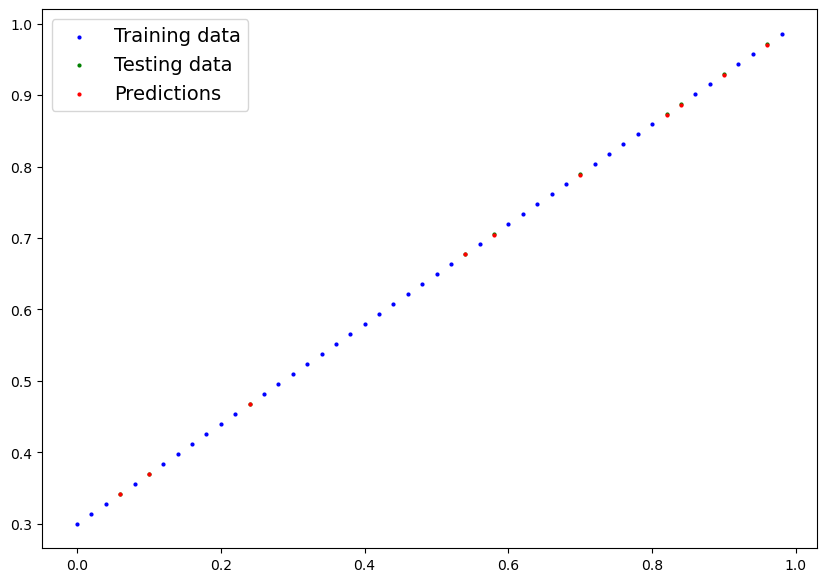

In [39]:
plot_predictions(predictions=y_preds.cpu())

In [40]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [43]:
loaded_model_1 = LinearRegressionV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(f"Loaded model:\n{loaded_model_1}")

Loaded model:
LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [44]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])